# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
# Create empty lists and counters for record and set

city_name = []
latitude = []
longitude = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
countries = []
date_time = []
record_counter = 0
set_counter = 1

# Print initial output as shown

print("Beginning Data Retrieval")
print("-----------------------------")

# Construct query URL

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

# Create for loop

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        countries.append(response["sys"]["country"])
        date_time.append(response["dt"])
        
        if record_counter > 48:
            record_counter = 0
            set_counter = set_counter + 1
        
        else:
            record_counter = record_counter + 1
        
        print(f"Processing Record {record_counter} of Set {set_counter} | {city}")
        
    except (KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | pevek
Processing Record 4 of Set 1 | fukue
Processing Record 5 of Set 1 | cherskiy
Processing Record 6 of Set 1 | aksarka
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | nedjo
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | constitucion
Processing Record 14 of Set 1 | vila velha
City not found. Skipping...
Processing Record 15 of Set 1 | sabha
Processing Record 16 of Set 1 | ust-maya
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | sao filipe
Processing Record 19 of Set 1 | rosarito
Processing Record 20 of Set 1 | palmer
Processing Record 21 of Set 1 | cape town
Processing Record 22 of Set 1 | faanui
Processing Record 23 of S

Processing Record 39 of Set 4 | adrar
Processing Record 40 of Set 4 | dauphin
Processing Record 41 of Set 4 | lyubech
Processing Record 42 of Set 4 | victoria
Processing Record 43 of Set 4 | kruisfontein
Processing Record 44 of Set 4 | muroto
Processing Record 45 of Set 4 | barrow
Processing Record 46 of Set 4 | mahebourg
Processing Record 47 of Set 4 | miri
Processing Record 48 of Set 4 | kannangad
Processing Record 49 of Set 4 | klaksvik
Processing Record 0 of Set 5 | bredasdorp
Processing Record 1 of Set 5 | tuatapere
Processing Record 2 of Set 5 | elizabethton
Processing Record 3 of Set 5 | verbilki
Processing Record 4 of Set 5 | port blair
City not found. Skipping...
Processing Record 5 of Set 5 | yatou
Processing Record 6 of Set 5 | berehove
Processing Record 7 of Set 5 | dingle
Processing Record 8 of Set 5 | dunmore town
Processing Record 9 of Set 5 | paraiso
Processing Record 10 of Set 5 | linxia
Processing Record 11 of Set 5 | ossora
Processing Record 12 of Set 5 | longyearbye

Processing Record 27 of Set 8 | port shepstone
Processing Record 28 of Set 8 | mehamn
Processing Record 29 of Set 8 | collie
Processing Record 30 of Set 8 | kudahuvadhoo
Processing Record 31 of Set 8 | ostrovnoy
Processing Record 32 of Set 8 | las vegas
Processing Record 33 of Set 8 | razgrad
Processing Record 34 of Set 8 | oskemen
Processing Record 35 of Set 8 | darnah
Processing Record 36 of Set 8 | ahipara
Processing Record 37 of Set 8 | tecoanapa
Processing Record 38 of Set 8 | trairi
Processing Record 39 of Set 8 | pirenopolis
Processing Record 40 of Set 8 | khovu-aksy
Processing Record 41 of Set 8 | ak-dovurak
Processing Record 42 of Set 8 | geraldton
Processing Record 43 of Set 8 | pisco
Processing Record 44 of Set 8 | port moresby
Processing Record 45 of Set 8 | zarautz
Processing Record 46 of Set 8 | port pirie
Processing Record 47 of Set 8 | shanghai
Processing Record 48 of Set 8 | salalah
Processing Record 49 of Set 8 | cockburn town
Processing Record 0 of Set 9 | verkhnyaya

Processing Record 13 of Set 12 | igarka
Processing Record 14 of Set 12 | thinadhoo
Processing Record 15 of Set 12 | puksoozero
Processing Record 16 of Set 12 | ayan
Processing Record 17 of Set 12 | pilar
Processing Record 18 of Set 12 | egvekinot
Processing Record 19 of Set 12 | panaba
Processing Record 20 of Set 12 | canavieiras
Processing Record 21 of Set 12 | north bend
Processing Record 22 of Set 12 | uruacu
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

weather_df.to_csv("output_data/cities.csv", index = False)

In [10]:
# Create DataFrame

weather_df = pd.DataFrame({"City": city_name, "Latitude": latitude, "Longitude": longitude, "Max Temp": max_temp, "Humidity": humidity, "Cloudiness": cloudiness, "Wind Speed": wind_speed, "Country": countries, "Date": date_time})

weather_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Butaritari,3.0707,172.7902,83.88,73,10,18.14,KI,1632791263
1,Vaini,-21.2000,-175.2000,80.76,78,20,6.91,TO,1632791270
2,Pevek,69.7008,170.3133,23.76,74,100,5.73,RU,1632791260
3,Fukuechō,32.6881,128.8419,77.14,77,86,7.63,JP,1632791549
4,Cherskiy,68.7500,161.3000,22.95,95,100,17.49,RU,1632791381
...,...,...,...,...,...,...,...,...,...
567,Egvekinot,66.3167,-179.1667,27.07,81,100,2.95,RU,1632791410
568,Panabá,21.2833,-88.2667,76.32,90,1,7.85,MX,1632791693
569,Canavieiras,-15.6750,-38.9472,71.87,88,6,4.74,BR,1632791694
570,North Bend,43.4065,-124.2243,57.85,97,40,10.36,US,1632791258


In [11]:
# Export DataFrame as .csv file

weather_df.to_csv ("../output_data/cities.csv", index = False)
weather_df.head(10)

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Butaritari,3.0707,172.7902,83.88,73,10,18.14,KI,1632791263
1,Vaini,-21.2000,-175.2000,80.76,78,20,6.91,TO,1632791270
2,Pevek,69.7008,170.3133,23.76,74,100,5.73,RU,1632791260
3,Fukuechō,32.6881,128.8419,77.14,77,86,7.63,JP,1632791549
4,Cherskiy,68.7500,161.3000,22.95,95,100,17.49,RU,1632791381
5,Aksarka,66.5606,67.7975,31.06,84,100,10.16,RU,1632791270
6,Yellowknife,62.4560,-114.3525,43.41,80,20,4.00,CA,1632791103
7,Jamestown,42.0970,-79.2353,67.84,82,1,1.01,US,1632791134
8,Busselton,-33.6500,115.3333,60.04,73,100,8.55,AU,1632791247
9,Hermanus,-34.4187,19.2345,54.90,80,6,6.24,ZA,1632791293


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

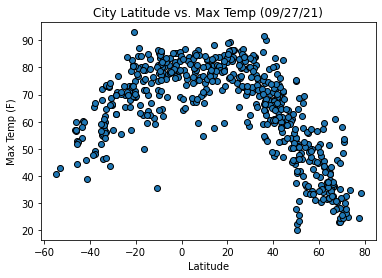

In [12]:
# Create plot
plt.scatter(weather_df["Latitude"], weather_df["Max Temp"], edgecolor = "black")

# Title plot and label axes
today = date.today()
plt.title(f"City Latitude vs. Max Temp ({today.strftime('%m/%d/%y')})")
#plt.title("City Latitude vs. Max Temperature (09/22/2021)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")


# Save graph as .png
plt.savefig('../output_data/latitude_max temp.png')

## Latitude vs. Humidity Plot

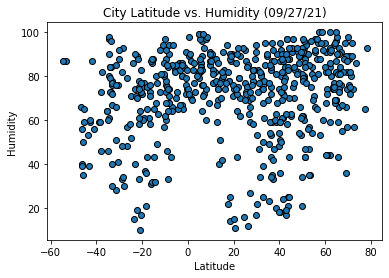

In [14]:
# Create plot
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], edgecolor = "black")

# Title plot and label axes
today = date.today()
plt.title(f"City Latitude vs. Humidity ({today.strftime('%m/%d/%y')})")
#plt.title("City Latitude vs. Humidity (09/22/2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save graph as .png
plt.savefig('../output_data/latitude_humidity.png')

## Latitude vs. Cloudiness Plot

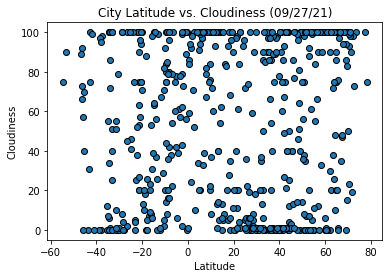

In [15]:

# Create plot
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], edgecolor = "black")

# Title plot and label axes
today = date.today()
plt.title(f"City Latitude vs. Cloudiness ({today.strftime('%m/%d/%y')})")
#plt.title("City Latitude vs. Cloudiness (09/22/2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save graph as .png
plt.savefig('../output_data/latitude_cloudiness.png')

## Latitude vs. Wind Speed Plot

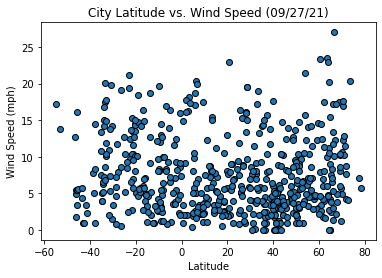

In [16]:

# Create plot
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], edgecolor = "black")

# Title plot and label axes
today = date.today()
plt.title(f"City Latitude vs. Wind Speed ({today.strftime('%m/%d/%y')})")
#plt.title("City Latitude vs. Wind Speed (09/22/2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save graph as .png
plt.savefig('../output_data/latitude_wind speed.png')

## Linear Regression

In [20]:
# Split data into Northern and Southern hemispheres
# Northern hemisphere data base
northern_hemisphere = weather_df.loc[weather_df["Latitude"]>=0]
# view data base
northern_hemisphere


,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Butaritari,3.0707,172.7902,83.88,73,10,18.14,KI,1632791263
2,Pevek,69.7008,170.3133,23.76,74,100,5.73,RU,1632791260
3,Fukuechō,32.6881,128.8419,77.14,77,86,7.63,JP,1632791549
4,Cherskiy,68.7500,161.3000,22.95,95,100,17.49,RU,1632791381
5,Aksarka,66.5606,67.7975,31.06,84,100,10.16,RU,1632791270
...,...,...,...,...,...,...,...,...,...
564,Puksoozero,62.5903,40.6066,41.58,92,100,1.57,RU,1632791692
565,Ayan,56.4500,138.1667,49.21,65,66,5.41,RU,1632791693
567,Egvekinot,66.3167,-179.1667,27.07,81,100,2.95,RU,1632791410
568,Panabá,21.2833,-88.2667,76.32,90,1,7.85,MX,1632791693


In [21]:
#Southern hemishere data base
southern_hemisphere = weather_df.loc[weather_df["Latitude"]<0]
#view data base
southern_hemisphere

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Vaini,-21.2000,-175.2000,80.76,78,20,6.91,TO,1632791270
8,Busselton,-33.6500,115.3333,60.04,73,100,8.55,AU,1632791247
9,Hermanus,-34.4187,19.2345,54.90,80,6,6.24,ZA,1632791293
11,Punta Arenas,-53.1500,-70.9167,42.82,87,90,13.80,CL,1632791249
12,Constitución,-35.3333,-72.4167,52.00,64,0,7.54,CL,1632791550
...,...,...,...,...,...,...,...,...,...
554,Fare,-16.7000,-151.0167,79.12,76,9,16.35,PF,1632791298
561,La Paz,-16.5000,-68.1500,49.98,71,20,5.75,BO,1632791692
566,Pilar,-9.5972,-35.9567,78.73,92,75,3.83,BR,1632791693
569,Canavieiras,-15.6750,-38.9472,71.87,88,6,4.74,BR,1632791694


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8207463719409206


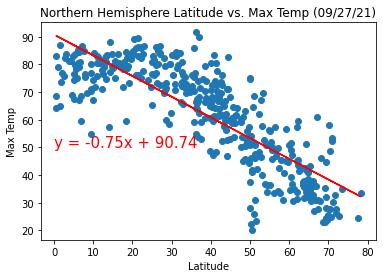

<Figure size 432x288 with 0 Axes>

In [24]:
x_values = northern_hemisphere['Latitude']

y_values = northern_hemisphere['Max Temp']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

today = date.today()
plt.title(f"Northern Hemisphere Latitude vs. Max Temp ({today.strftime('%m/%d/%y')})")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig('../output_data/northern_linear_latitude_max temp')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7196725971543391


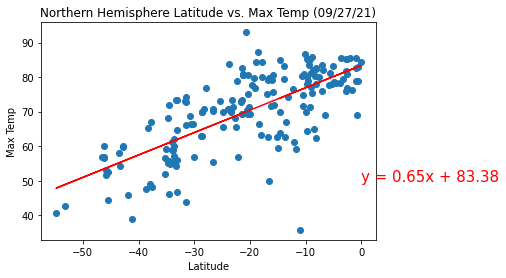

<Figure size 432x288 with 0 Axes>

In [25]:
x_values = southern_hemisphere['Latitude']

y_values = southern_hemisphere['Max Temp']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

today = date.today()
plt.title(f"Northern Hemisphere Latitude vs. Max Temp ({today.strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig('../output_data/southern_linear_latitude_max temp.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.01740044615644803


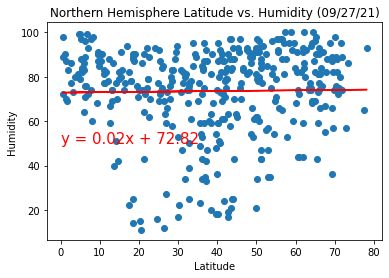

<Figure size 432x288 with 0 Axes>

In [26]:
x_values =northern_hemisphere['Latitude']
y_values = northern_hemisphere['Humidity']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

today = date.today()
plt.title(f"Northern Hemisphere Latitude vs. Humidity ({today.strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig('../output_data/northern_linear_lat_Humidity.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.20410120872928394


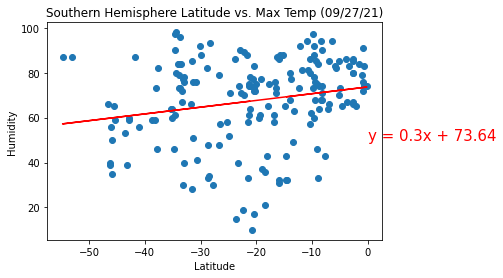

<Figure size 432x288 with 0 Axes>

In [27]:
x_values =southern_hemisphere['Latitude']
y_values = southern_hemisphere['Humidity']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

today = date.today()
plt.title(f"Southern Hemisphere Latitude vs. Max Temp ({today.strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig('../output_data/southern_linear_lat_humidity.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.08740365120308066


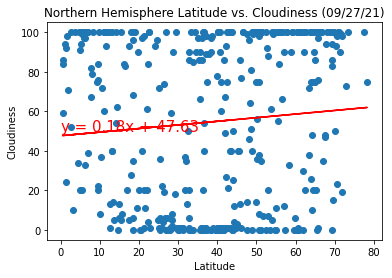

<Figure size 432x288 with 0 Axes>

In [28]:
x_values =northern_hemisphere['Latitude']
y_values = northern_hemisphere['Cloudiness']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

today = date.today()
plt.title(f"Northern Hemisphere Latitude vs. Cloudiness ({today.strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig('../output_data/northern_linear_lat_cloudiness.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05289155414811278


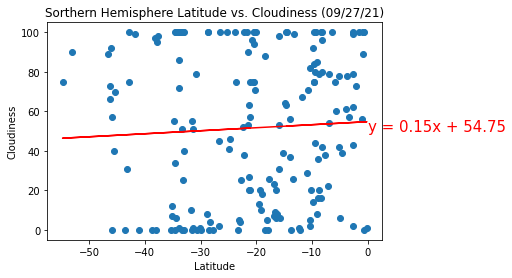

<Figure size 432x288 with 0 Axes>

In [29]:
x_values =southern_hemisphere['Latitude']
y_values = southern_hemisphere['Cloudiness']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

today = date.today()
plt.title(f"Sorthern Hemisphere Latitude vs. Cloudiness ({today.strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig('../output_data/southern_linear_lat_cloudiness.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0881395400080453


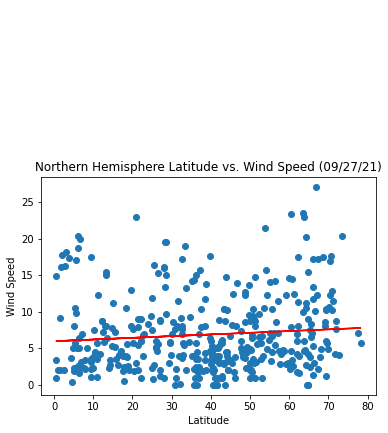

<Figure size 432x288 with 0 Axes>

In [30]:
x_values = northern_hemisphere['Latitude']
y_values = northern_hemisphere['Wind Speed']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")


today = date.today()
plt.title(f"Northern Hemisphere Latitude vs. Wind Speed ({today.strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig('../output_data/northern_linear_lat_windspeed.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.1039365101245521


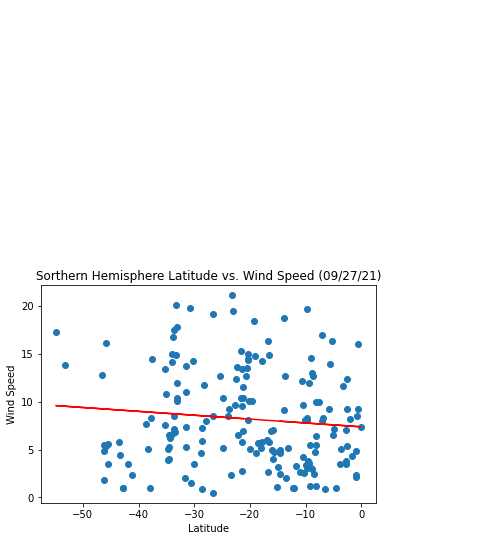

<Figure size 432x288 with 0 Axes>

In [31]:
x_values = southern_hemisphere['Latitude']
y_values = southern_hemisphere['Wind Speed']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

today = date.today()
plt.title(f"Sorthern Hemisphere Latitude vs. Wind Speed ({today.strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig('../output_data/southern_linear_lat_windspeed.png')